In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import zscore
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/Description.docx
/kaggle/input/stock-market-dataset/Test_small_features.csv
/kaggle/input/stock-market-dataset/Train_full.csv


**Đọc dữ liệu**

In [2]:
data = pd.read_csv('/kaggle/input/stock-market-dataset/Train_full.csv')
data = data.drop(columns = data.columns[0])

**Xem tât cả các đặc trưng dữ liệu**

In [3]:
data.columns.values

array(['Open', 'High', 'Low', 'Close', 'Volume', 'body', 'upper_tail',
       'lower_tail', 'SMA_50', 'SMA_20', 'ATR', 'CCI', 'SAR', 'hour',
       'min', 'dayofweek', 'JPY', 'AUD', 'EUR', 'GBP', 'USD',
       'lag_return_1', 'return_2', 'lag_return_2', 'return_3',
       'lag_return_3', 'return_4', 'lag_return_4', 'return_5',
       'lag_return_5', 'return_6', 'lag_return_6', 'return_7',
       'lag_return_7', 'return_8', 'lag_return_8', 'return_9',
       'lag_return_9', 'return_10', 'lag_return_10', 'return_11',
       'lag_return_11', 'return_12', 'lag_return_12', 'return_13',
       'lag_return_13', 'return_14', 'lag_return_14', 'return_15',
       'lag_return_15', 'return_16', 'lag_return_16', 'return_17',
       'lag_return_17', 'return_18', 'lag_return_18', 'return_19',
       'lag_return_19', 'return_20', 'lag_return_20', 'return_21',
       'lag_return_21', 'return_22', 'lag_return_22', 'return_23',
       'lag_return_23', 'return_24', 'lag_return_24', 'return_25',
       'la

**Nhìn vào dữ liệu ta thấy thiếu đặc trưng return_1, theo tính chất của dữ liệu thì return_1 = return_2 - lag_return_1**

In [4]:
data['return_1'] = data['return_2'] - data['lag_return_1']
data.shape

(709314, 214)

**Kiểm tra giá trị còn thiếu trong dữ liệu**

In [5]:
data.isnull().values.sum()

0

Lọc ngoại lệ với phương Z_Score với ngưỡng = 4

In [6]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
df = data[filtered_entries]


**Chia ra biến đoc lập và biến phụ thuộc**

In [7]:
Y = df["up_down"] #independent columns
X = df.drop(columns="up_down")
columns = X.columns

In [8]:
feature_set = ['Close', 'High', 'Low', 'return_1', 'return_2', 'return_3']

In [9]:
x=X[feature_set]
y=Y


**Sử dụng Kfold để đánh giá**

In [10]:
##from sklearn.model_selection import train_test_split
##X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
kf = KFold(n_splits=10)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
i=0
A=0
P=0
R=0
F=0
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]     
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    i=i+1
    print("so luong tap train ",i,": ",X_train.shape[0])
    print("so luong tap test ",i,": ",X_train.shape[0])
    accuracy = accuracy_score(Y_test,Y_pred)
    print("Accuracy: %.2f%%",(accuracy * 100.0))
    A=A+accuracy
    from sklearn.metrics import precision_score
    print("Precision = ",precision_score(Y_test, Y_pred))
    P=P+precision_score(Y_test, Y_pred)
    from sklearn.metrics import recall_score
    print("Recall = ",recall_score(Y_test, Y_pred))
    R=R+recall_score(Y_test, Y_pred)
    from sklearn.metrics import f1_score
    print("F-measure = ",f1_score(Y_test, Y_pred))
    F=F+f1_score(Y_test, Y_pred)
print("Trung binh Accuracy = ", A/10)
print("Trung binh Precision = ", P/10)
print("Trung binh Recall = ", R/10)
print("Trung binh F-measure = ",F/10)

KFold(n_splits=10, random_state=None, shuffle=False)
Accuracy =  0.7069673765653666
Precision =  0.5426160337552742
Recall =  0.1703424067819061
F-measure =  0.25928726246282574
Accuracy =  0.7915370503310202
Precision =  0.521226155033631
Recall =  0.4361103422824984
F-measure =  0.47488446855535466
Accuracy =  0.7037908548866333
Precision =  0.5270300169629029
Recall =  0.45845897222044013
F-measure =  0.4903588828655734
Accuracy =  0.7373123018326121
Precision =  0.5203650498563461
Recall =  0.4509703405346027
F-measure =  0.48318882655263057
Accuracy =  0.7380501326101262
Precision =  0.5222388805597201
Recall =  0.4586686174103877
F-measure =  0.48839383081476867
Accuracy =  0.7011785351067861
Precision =  0.5236414961185604
Recall =  0.4284064665127021
F-measure =  0.471260717688155
Accuracy =  0.6868008056314435
Precision =  0.5209585574185385
Recall =  0.4057033752155703
F-measure =  0.4561634349030471
Accuracy =  0.7011984764791513
Precision =  0.5231991192198805
Recall =  0.4

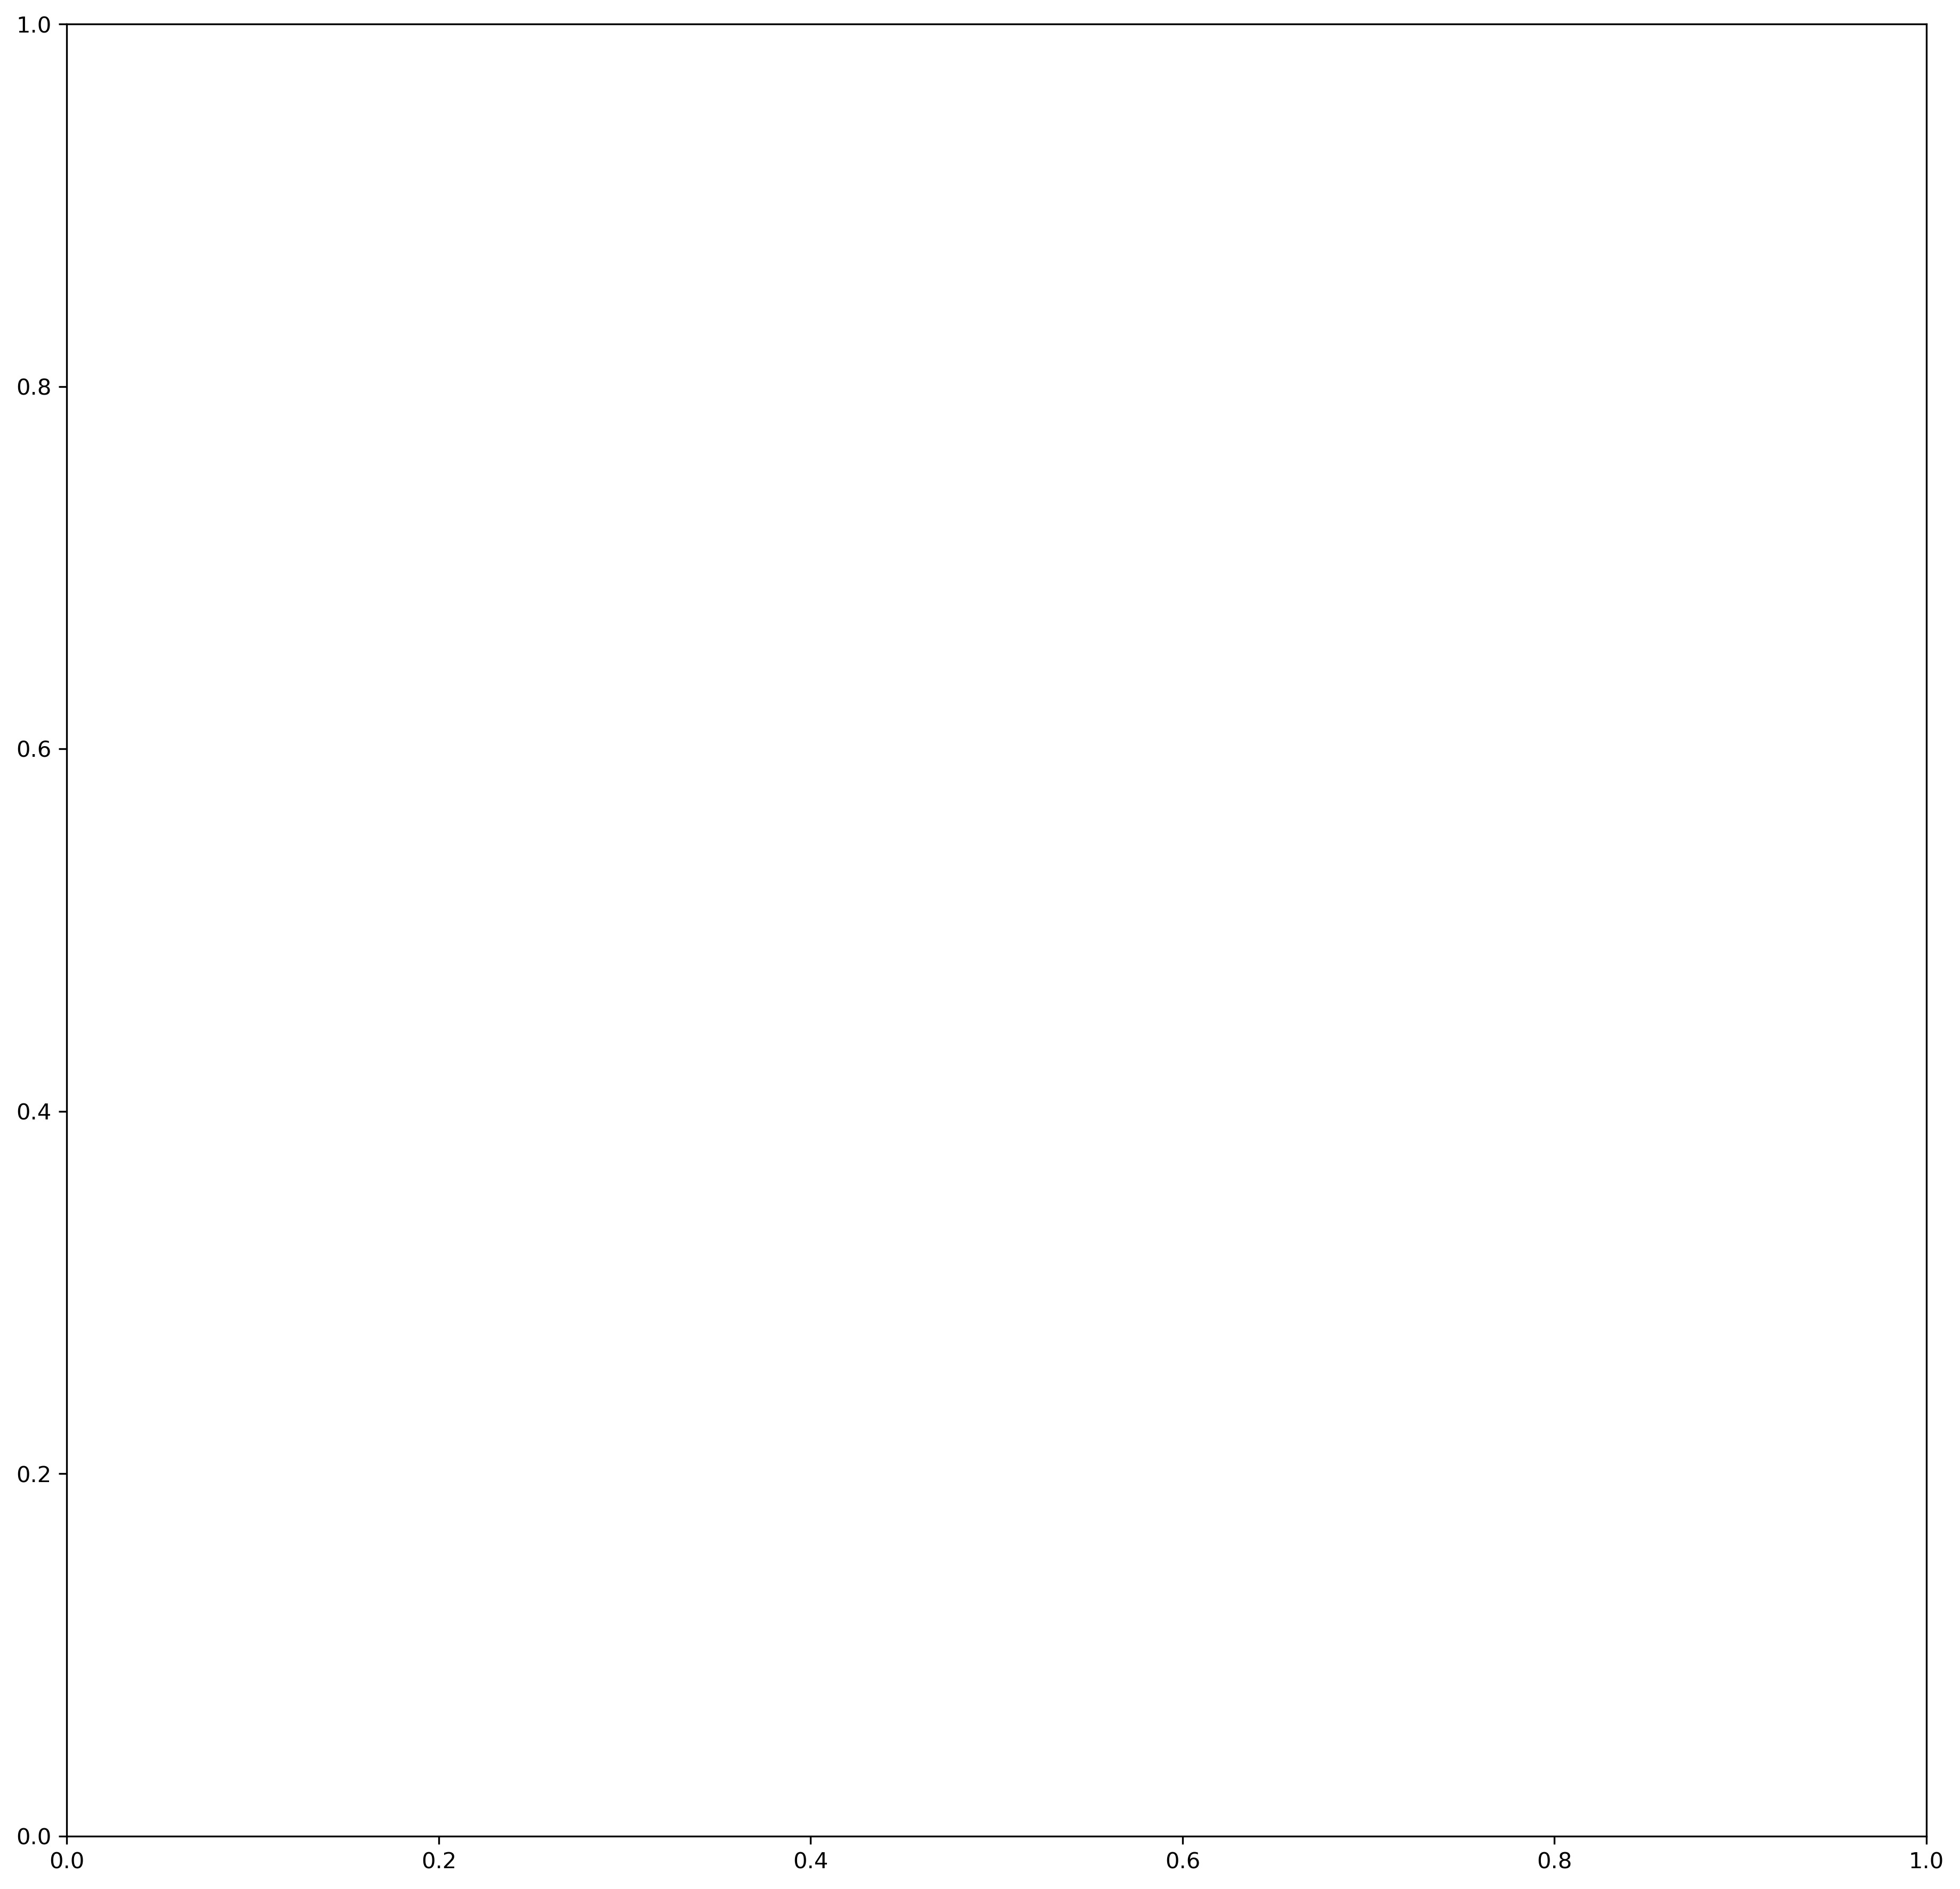

In [16]:
from xgboost import plot_tree
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x, y)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (15,15), dpi=300)
plot_tree(model,filled = True)
plt.show()